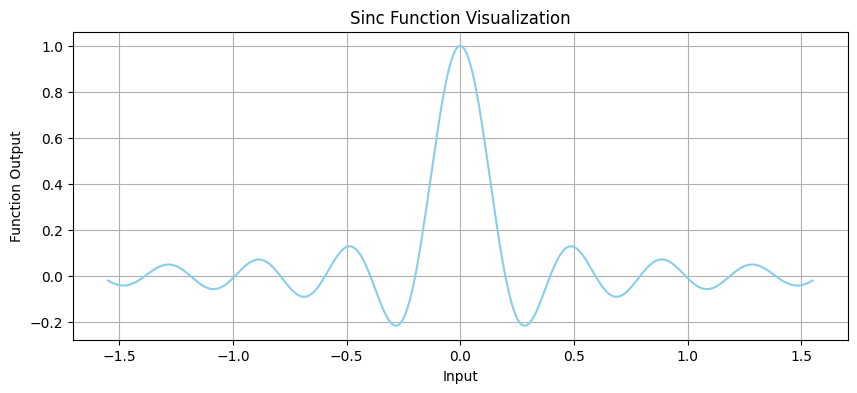

Total parameters: 572
Epoch: 0, Loss: 0.0617
Epoch: 400, Loss: 0.0055
Epoch: 800, Loss: 0.0011
Epoch: 1200, Loss: 0.0006
Epoch: 1600, Loss: 0.0004
Epoch: 2000, Loss: 0.0002
Epoch: 2400, Loss: 0.0001
Epoch: 2800, Loss: 0.0002
Epoch: 3200, Loss: 0.0001
Training complete


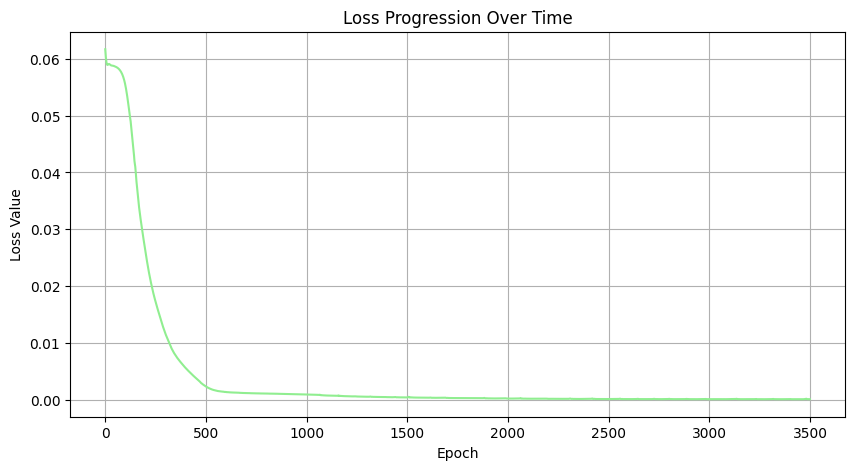

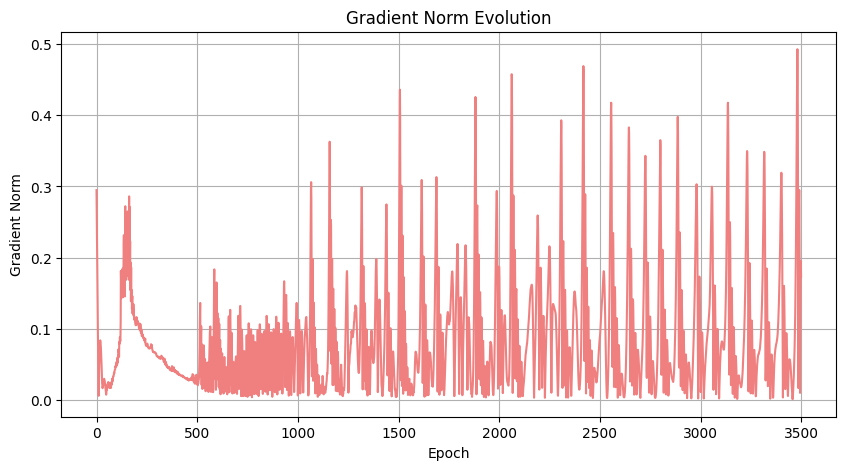

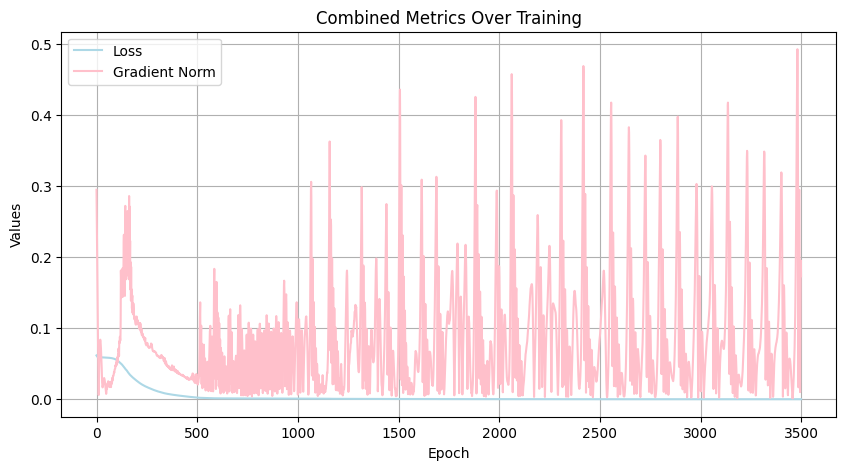

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

input_data = np.linspace(-1.55, 1.55, 305).reshape(-1, 1)
target_data = np.sinc(5.05 * input_data)

inputs = torch.tensor(input_data, dtype=torch.float32)
targets = torch.tensor(target_data, dtype=torch.float32)

plt.figure(figsize=(10, 4))
plt.plot(inputs, targets, color="skyblue")
plt.title('Sinc Function Visualization')
plt.xlabel('Input')
plt.ylabel('Function Output')
plt.grid(True)
plt.show()

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layer_sequence = nn.Sequential(
            nn.Linear(1, 4),
            nn.LeakyReLU(),
            nn.Linear(4, 9),
            nn.LeakyReLU(),
            nn.Linear(9, 12),
            nn.LeakyReLU(),
            nn.Linear(12, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 4),
            nn.LeakyReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.layer_sequence(x)

net = NeuralNet()
print(f'Total parameters: {sum(p.numel() for p in net.parameters())}')

def train(net, inputs, targets):
    epochs = 3500
    optimizer = torch.optim.Adam(net.parameters(), lr=0.00105, weight_decay=0.000015)
    criterion = nn.MSELoss()
    loss_history, grad_history = [], []

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())
        gradient_norm = sum(p.grad.norm().item() for p in net.parameters() if p.grad is not None)
        grad_history.append(gradient_norm)

        if epoch % 400 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

    print('Training complete')
    return loss_history, grad_history

loss_history, grad_history = train(net, inputs, targets)

plt.figure(figsize=(10, 5))
plt.plot(loss_history, color="lightgreen")
plt.title('Loss Progression Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(grad_history, color="lightcoral")
plt.title('Gradient Norm Evolution')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(loss_history, color="lightblue", label='Loss')
plt.plot(grad_history, color="pink", label='Gradient Norm')
plt.title('Combined Metrics Over Training')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
